In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

# Shows files

In [2]:
config_names = ["MESSI+\nSAX+\nSIMD",
               #"MESSI+\nSFA+ED",
               "MESSI+\nSFA+ED+\nSIMD",
               #"MESSI+\nSFA+EW",
               "MESSI+\nSFA+EW+\nSIMD"]

        
path = "logs/MESSI_SFA_logs_index"
all_files = read_logs(log_type="index", path=path, config_names = config_names)

Config logs/MESSI_SFA_logs_index/ASTRO/09
Queries 0 MESSI_INDEX_2024_07_02_20:34:54.csv ASTRO - gruenau1 - CPUs 09 MESSI_INDEX_2024_07_02_20:34:54.csv
Queries 1 MESSI_INDEX_2024_07_02_20:39:10.csv ASTRO - gruenau1 - CPUs 09 MESSI_INDEX_2024_07_02_20:39:10.csv
Queries 2 MESSI_INDEX_2024_07_02_20:41:56.csv ASTRO - gruenau1 - CPUs 09 MESSI_INDEX_2024_07_02_20:41:56.csv
Config logs/MESSI_SFA_logs_index/ASTRO/18
Queries 0 MESSI_INDEX_2024_07_02_22:29:41.csv ASTRO - gruenau1 - CPUs 18 MESSI_INDEX_2024_07_02_22:29:41.csv
Queries 1 MESSI_INDEX_2024_07_02_22:32:10.csv ASTRO - gruenau1 - CPUs 18 MESSI_INDEX_2024_07_02_22:32:10.csv
Queries 2 MESSI_INDEX_2024_07_02_22:33:47.csv ASTRO - gruenau1 - CPUs 18 MESSI_INDEX_2024_07_02_22:33:47.csv
Config logs/MESSI_SFA_logs_index/ASTRO/36
Queries 0 MESSI_INDEX_2024_07_03_00:16:23.csv ASTRO - gruenau1 - CPUs 36 MESSI_INDEX_2024_07_03_00:16:23.csv
Queries 1 MESSI_INDEX_2024_07_03_00:23:51.csv ASTRO - gruenau1 - CPUs 36 MESSI_INDEX_2024_07_03_00:23:51.csv
Qu

In [3]:
indexing_times = pd.DataFrame(columns=["method", "binning", "transformation", "indexing", "total time"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    for name, file in files.items():
        # print(file)
        df = pd.read_csv(file)
        # display(df)
        df["binning"] = df["binning"] * 1e-6
        df["indexing total"] = df["indexing total"] * 1e-6 
        df["total time"] = df["total time"] * 1e-6

        df["transformation"] = df[" transformation"] * 1e-6  / np.int32(file.split("/")[3])        
        df["indexing"] = df["indexing total"] - df["transformation"]
        
        # df["transformation"] = df[" transformation"] / (df[" indexing"] + df[" transformation"]) * df["total time"]
        # df["indexing"] = df[" indexing"] / (df[" indexing"] + df[" transformation"]) * df["total time"]
        
        df["method"] = name
        df["config"] = file.split("/")[3]
        df["dataset"] = file.split("/")[2]
        df_all = pd.concat([df_all, df], ignore_index=True)        
        indexing_times = pd.concat([indexing_times, df[["method", "config", "dataset", "binning", "transformation", "indexing", "indexing total", "total time"]]], ignore_index=True)

        i = i+1

subset = indexing_times.rename(columns={
    "method":"Method", 
    "binning": "Learning Bins", # "indexing total": "Indexing Total",
    "transformation" : "Transformation", 
    "indexing" : "Indexing",
    "indexing total" : "Indexing Total", 
    "total time" : "Total Time"})

# subset = subset[query_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+ED+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]

subset = subset[indexing_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]

subset.Method.replace("MESSI+\nSAX+\nSIMD", "MESSI 1.0", inplace=True)
subset.Method.replace("MESSI+\nSFA+EW+\nSIMD", "MESSI 2.0", inplace=True)
subset


,Method,Learning Bins,Transformation,Indexing,Total Time,config,dataset,Indexing Total
0,MESSI 1.0,0.000000,8.840131,7.537306,16.377437,09,ASTRO,16.377437
2,MESSI 2.0,2.156141,28.181577,6.653955,36.991673,09,ASTRO,34.835532
3,MESSI 1.0,0.000000,4.394923,6.357364,10.752287,18,ASTRO,10.752287
5,MESSI 2.0,3.309234,14.207388,6.292016,23.808638,18,ASTRO,20.499404
6,MESSI 1.0,0.000000,6.355121,45.204456,51.559577,36,ASTRO,51.559577
...,...,...,...,...,...,...,...,...
146,MESSI 2.0,2.243781,10.131366,4.106248,16.481395,09,TXED,14.237614
147,MESSI 1.0,0.000000,1.614979,3.550018,5.164997,18,TXED,5.164997
149,MESSI 2.0,3.351258,5.204217,4.958394,13.513869,18,TXED,10.162611
150,MESSI 1.0,0.000000,1.202726,6.375825,7.578551,36,TXED,7.578551


In [4]:
FAISS_all_files = read_faiss_logs(log_type="index")
FAISS_indexing_times = pd.DataFrame(columns=[
    "Method", "Learning Bins", "Transformation", "Indexing", "Total Time", "config", "dataset", "Indexing Total"])

i = 0
for ds_name, files in FAISS_all_files.items():
    df_all = pd.DataFrame()
    for config, file in files.items():
        # print(file)
        df = pd.read_csv(file)        
        df["Indexing"] = df["# index creation time in ms"] / 1000
        df["Method"] = "FAISS"
        if config == "9":
            config = "09"
        df["config"] = config
        
        name = file.split("/")[2]
        df["dataset"] = name[name.find("_")+1:name.rfind("_")]
        
        df_all = pd.concat([df_all, df], ignore_index=True)        
        FAISS_indexing_times = pd.concat([
            FAISS_indexing_times, df[["Method", "Indexing", "config", "dataset"]]], ignore_index=True)
        i = i+1
        
FAISS_indexing_times.fillna(0, inplace=True)
FAISS_indexing_times.head()

,Method,Learning Bins,Transformation,Indexing,Total Time,config,dataset,Indexing Total
0,FAISS,0,0,43.727886,0,18,ASTRO,0
1,FAISS,0,0,62.028719,0,36,ASTRO,0
2,FAISS,0,0,55.001067,0,09,ASTRO,0
3,FAISS,0,0,24.922127,0,18,BIGANN,0
4,FAISS,0,0,24.454261,0,36,BIGANN,0


In [5]:
np.unique(FAISS_indexing_times.dataset)

array(['ASTRO', 'BIGANN', 'DEEP1B', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1B', 'STEAD', 'TXED'], dtype=object)

In [6]:
np.unique(indexing_times.dataset)

array(['ASTRO', 'BIGANN', 'DEEP1b', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1b', 'STEAD', 'TXED'], dtype=object)

In [7]:
subset = pd.concat([subset, FAISS_indexing_times], ignore_index=True)    # 
subset

,Method,Learning Bins,Transformation,Indexing,Total Time,config,dataset,Indexing Total
0,MESSI 1.0,0.000000,8.840131,7.537306,16.377437,09,ASTRO,16.377437
1,MESSI 2.0,2.156141,28.181577,6.653955,36.991673,09,ASTRO,34.835532
2,MESSI 1.0,0.000000,4.394923,6.357364,10.752287,18,ASTRO,10.752287
3,MESSI 2.0,3.309234,14.207388,6.292016,23.808638,18,ASTRO,20.499404
4,MESSI 1.0,0.000000,6.355121,45.204456,51.559577,36,ASTRO,51.559577
...,...,...,...,...,...,...,...,...
148,FAISS,0.000000,0.000000,59.833825,0.000000,36,STEAD,0.000000
149,FAISS,0.000000,0.000000,69.629763,0.000000,09,STEAD,0.000000
150,FAISS,0.000000,0.000000,16.242055,0.000000,18,TXED,0.000000
151,FAISS,0.000000,0.000000,15.846089,0.000000,36,TXED,0.000000


In [8]:
subset.set_index(["Method"])[[ "Indexing Total", "Indexing", "Transformation",  "Learning Bins" ]].groupby(["Method"]).mean()

,Indexing Total,Indexing,Transformation,Learning Bins
Method,,,,
FAISS,0.000000,24.775684,0.000000,0.000000
MESSI 1.0,21.201493,17.121111,4.080381,0.000000
MESSI 2.0,41.773154,32.056709,9.716445,2.838359


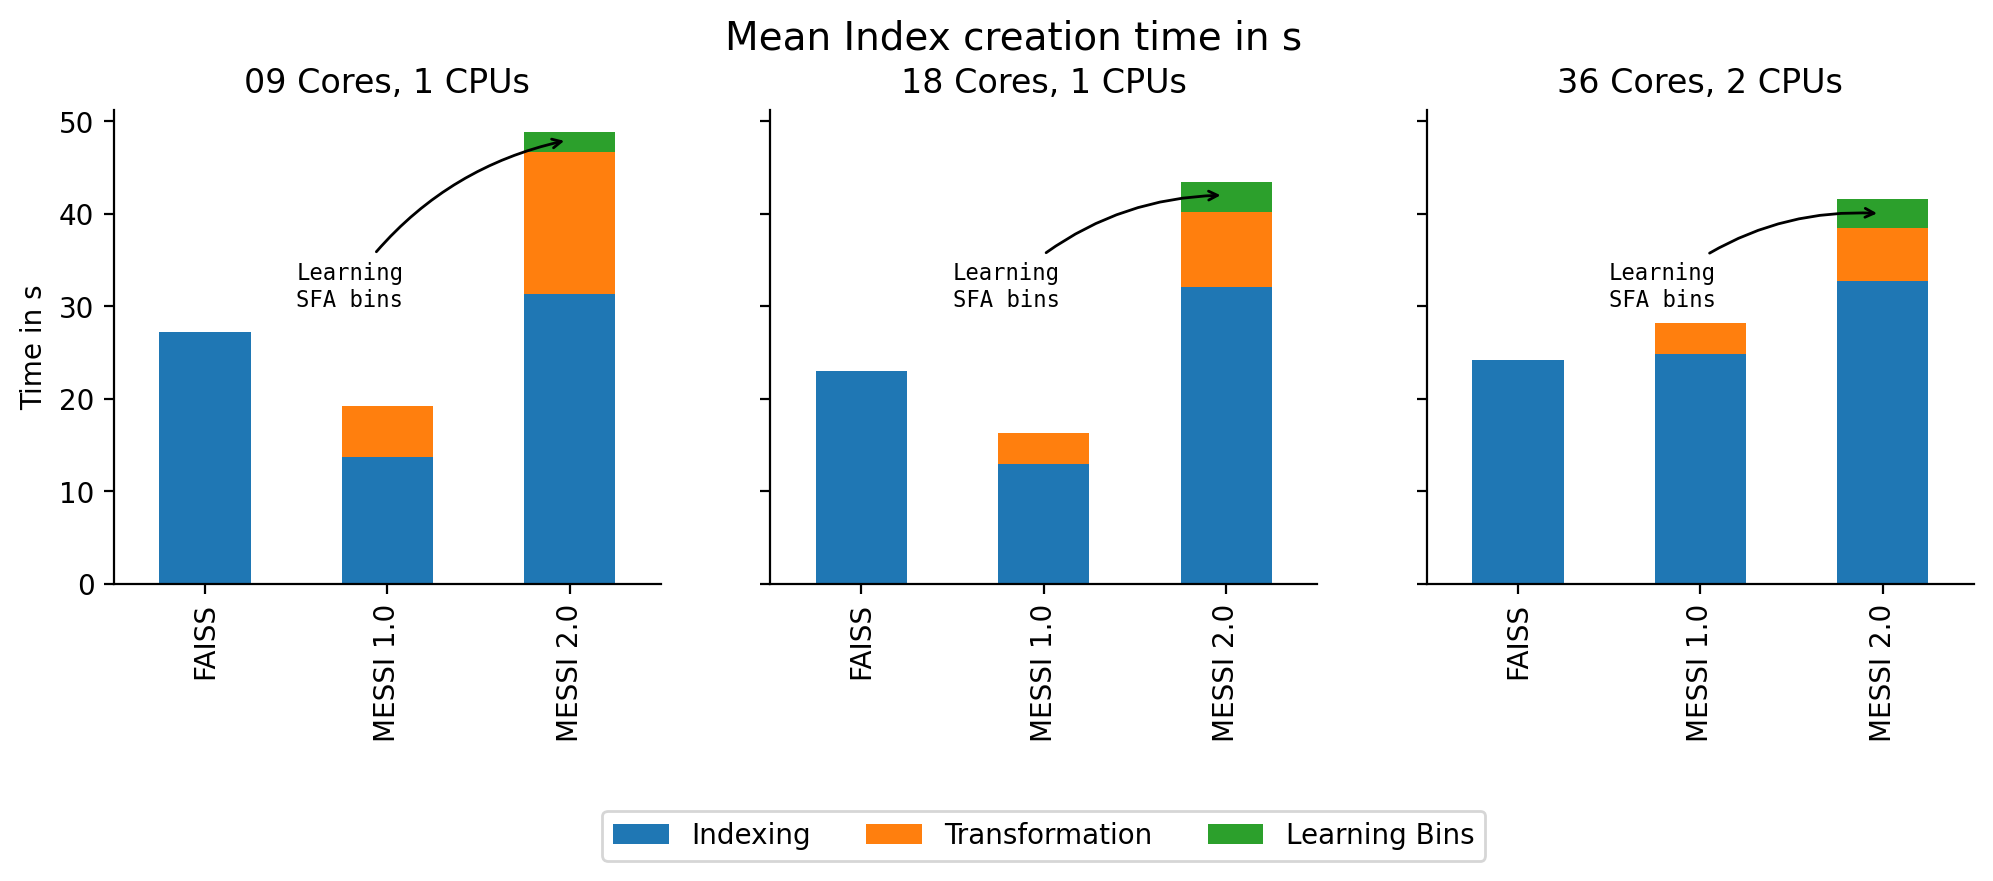

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12,3), sharey=True)
ALL_CORES = ["09", "18", "36"]

for i, CORES in enumerate(ALL_CORES):    
    subset_plot = subset[(subset.config==CORES)]

    #, "Transformation"
    subset_plot.set_index(["Method"])[[ "Indexing", "Transformation",  "Learning Bins" ]].groupby(["Method"]).mean() \
        .plot(kind='bar', stacked=True, ax=axes[i])

    if i <= 1:
        axes[i].legend([],[], frameon=False)
    axes[i].set_title(str(CORES)+" Cores, " + str(np.int32(np.ceil(np.int32(CORES)/18))) +" CPUs")
    axes[i].set_xlabel("")

    if i == 0:
        axes[i].set_ylabel("Time in s")
    sns.despine()

plt.legend(loc='upper center', bbox_to_anchor=(-.7, -0.45), ncols=3)
# sns.move_legend(ax[2], "upper center", frameon=False, bbox_to_anchor=(.5, -0.45), ncol=4)

fig.subplots_adjust(top=0.9)
fig.suptitle("Mean Index creation time in s", y=1.05, size=14)

# axes[-1].legend(axes[-1], "bottom left", bbox_to_anchor=(1, 1))

axes[0].annotate('Learning\nSFA bins', xy=(2, 48), xytext=(0.5, 30),
         arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                         connectionstyle="arc3,rad=-.2"), 
         fontsize=8,fontfamily='monospace', ha='left');

axes[1].annotate('Learning\nSFA bins', xy=(2, 42), xytext=(0.5, 30),
         arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                         connectionstyle="arc3,rad=-.2"), 
         fontsize=8,fontfamily='monospace', ha='left');


axes[2].annotate('Learning\nSFA bins', xy=(2, 40), xytext=(0.5, 30),
         arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                         connectionstyle="arc3,rad=-.2"), 
         fontsize=8,fontfamily='monospace', ha='left');

plt.savefig("images/experiment_index_creation.pdf", bbox_inches='tight')

In [10]:
subset.set_index([
    "Method", "config"])[["Indexing Total", "Transformation", "Learning Bins", "Indexing"]].groupby(["Method", "config"]).mean()


Indexing Total  Transformation  Learning Bins   Indexing
Method    config                                                          
FAISS     09            0.000000        0.000000       0.000000  27.177720
          18            0.000000        0.000000       0.000000  22.982606
          36            0.000000        0.000000       0.000000  24.166724
MESSI 1.0 09           19.182878        5.508515       0.000000  13.674363
          18           16.258311        3.342564       0.000000  12.915747
          36           28.163289        3.390065       0.000000  24.773224
MESSI 2.0 09           46.692035       15.387769       2.119788  31.304267
          18           40.206025        8.094274       3.250006  32.111751
          36           38.421402        5.667291       3.145281  32.754111

In [11]:
subset[subset.Method == ("MESSI 2.0")][["dataset", "Indexing Total"]]

,dataset,Indexing Total
1,ASTRO,34.835532
3,ASTRO,20.499404
5,ASTRO,18.198323
7,BIGANN,33.429894
9,BIGANN,39.425726
11,BIGANN,16.412174
13,DEEP1b,30.896311
15,DEEP1b,19.012780
17,DEEP1b,21.668763
19,ETHC,2.320219
